# Advanced Machine Learning Algorithms
_Exploring algorithms such as K-Nearest Neighbors (KNN), Random Forests and Boosting for a binary classification task using a bank marketing data set._

In [1]:
# imports required packages

import pandas as pd
from pandas import option_context

from sklearn.utils import resample, shuffle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data Set

This bank marketing data set available at the University of California, Irvine machine learning repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) is used in this section for the demonstration of various techniques. The dataset is based on a telemarketing campaign carried out by a Portuguese bank for subscription of a term deposit.

In [2]:
bank_marketing = pd.read_csv("./../../Data/bank_marketing.csv")

display(bank_marketing)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,5,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,1,0,no
4518,57,technician,married,secondary,no,295,no,no,11,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,4,3,no


In [3]:
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


## Data Preparation

### Handling Imbalanced Data Set

In [4]:
# Checking how balanced the data set is

print(bank_marketing.subscribed.value_counts())

no     4000
yes     521
Name: subscribed, dtype: int64


**Upsamping observations from minority class i.e. "yes"**

In [5]:
# Seperates data set based on term deposit subscription
bank_marketing_subscribed_yes = bank_marketing[bank_marketing.subscribed == "yes"]
bank_marketing_subscribed_no = bank_marketing[bank_marketing.subscribed == "no"]

# Upsamples the minority catogory ("yes") by 2000
bank_marketing_subscribed_yes_upsampled = resample(
    bank_marketing_subscribed_yes, replace=True, n_samples = 2000)

# Combining majority class with upsampled minority class
bank_marketing_balanced = pd.concat(
    [bank_marketing_subscribed_no, bank_marketing_subscribed_yes_upsampled])

# Shuffles the combined data set to avoid sampples to be in a particular order
bank_marketing_balanced = shuffle(bank_marketing_balanced)

In [6]:
# Prints the shape of the balanaced data set
print(bank_marketing_balanced.shape)

(6000, 11)


### Transforming Data Set

In [7]:
# Considers the following features for modeling
features = ["age", "job", "marital", "education", "default", "balance", "housing-loan",
            "personal-loan", "current-campaign", "previous-campaign"]

# Followings are the numeric features
num_features = ["age", "balance", "current-campaign", "previous-campaign"]

# Followings are the categorical features
cat_features = ["job", "marital", "education", "default", "housing-loan", "personal-loan"]

# Sets the name of the label into a variable
label = "subscribed"

In [8]:
# Configures column wise data transformation pipleline
transform_pipeline = ColumnTransformer([
    ("numeric", StandardScaler(), num_features), 
    ("categorical", OneHotEncoder(), cat_features)])

# Initializes encoder for label
label_encoder = LabelEncoder()

In [9]:
# Splits the data set into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    bank_marketing_balanced[features], bank_marketing_balanced.subscribed, test_size=0.3, 
    random_state=42, stratify=bank_marketing_balanced.subscribed)

In [10]:
# Checks for the same class distribution in both train and test data set
pd.DataFrame({"train": y_train.value_counts(), "test": y_test.value_counts()})

,train,test
no,2800,1200
yes,1400,600


In [11]:
# Prepares (transforms) the training data for modeling
X_train_transformed = transform_pipeline.fit_transform(X_train)
y_train_encoded = label_encoder.fit_transform(y_train)

In [12]:
# Prepares (transforms) the test data for modeling
X_test_transformed = transform_pipeline.transform(X_test)
y_test_encoded = label_encoder.transform(y_test)

## Training Models

### Logistic Regression Model

In [13]:
# Initializes the model
log_reg = LogisticRegression()

# Fits the model
log_reg.fit(X_train_transformed, y_train_encoded)

# Performs predictions
predictions = log_reg.predict(X_test_transformed)

In [14]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

#### Analyzes Model Performance

##### **Confusion Matrix**

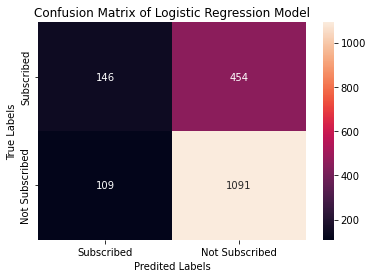

In [15]:
# Calculates Confusion Matrix and draws a heatmap out of that
conf_matrix = confusion_matrix(y_test_encoded, predictions, labels=[1,0])

sns.heatmap(
    conf_matrix, annot=True, fmt='.0f',
    xticklabels = ["Subscribed", "Not Subscribed"],
    yticklabels = ["Subscribed", "Not Subscribed"])

plt.ylabel("True Labels")
plt.xlabel("Predited Labels")
plt.title("Confusion Matrix of Logistic Regression Model")
plt.show()

In [16]:
# Prints the classification report
print(classification_report(y_test_encoded, predictions))

              precision    recall  f1-score   support

           0       0.71      0.91      0.79      1200
           1       0.57      0.24      0.34       600

    accuracy                           0.69      1800
   macro avg       0.64      0.58      0.57      1800
weighted avg       0.66      0.69      0.64      1800



As recall for positive cases is only ~0.20, most of the cases have been predicted as negative.

##### **Receiver Operating Characteristics (ROC) Curve & Area Under Curve (AUC) Score**


In [17]:
# Performs predictions to receive probabilities
predictions_proba = log_reg.predict_proba(X_test_transformed)

# Prints few predictions
print(predictions_proba)

[[0.91870918 0.08129082]
 [0.7389144  0.2610856 ]
 [0.61368171 0.38631829]
 ...
 [0.69892247 0.30107753]
 [0.88640219 0.11359781]
 [0.79765717 0.20234283]]


Second element of each the predictions contains probability for class label 1.

In [18]:
# Computes the ROC AUC score
auc_score = roc_auc_score(y_test_encoded, predictions_proba[:, 1])

# Prints the score
print("ROC AUC score: {:.2f}".format(auc_score))

ROC AUC score: 0.69


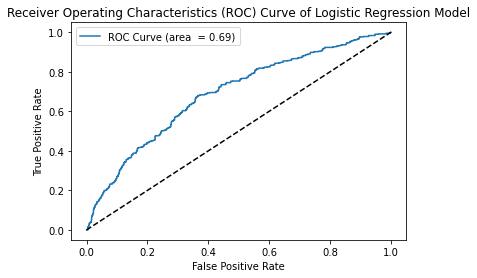

In [19]:
# Plots the ROC curve

fpr, tpr, thresholds = roc_curve(y_test_encoded, predictions_proba[:, 1], drop_intermediate=False)

plt.plot(fpr, tpr, label = "ROC Curve (area  = {:.2f})".format(auc_score))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics (ROC) Curve of Logistic Regression Model")
plt.legend()
plt.show()

### K-Nearest Neighbors (KNN) Algorithms

In [20]:
# Initializes the model
knn_clf = KNeighborsClassifier()

# Fits the model
knn_clf.fit(X_train_transformed, y_train_encoded)

# Performs predictions
predictions = knn_clf.predict(X_test_transformed)

#### Analyzes Model Performance

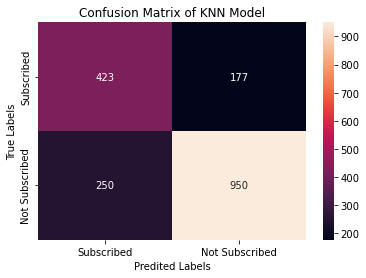

In [21]:
# Calculates Confusion Matrix and draws a heatmap out of that
conf_matrix = confusion_matrix(y_test_encoded, predictions, labels=[1,0])

sns.heatmap(
    conf_matrix, annot=True, fmt='.0f',
    xticklabels = ["Subscribed", "Not Subscribed"],
    yticklabels = ["Subscribed", "Not Subscribed"])

plt.ylabel("True Labels")
plt.xlabel("Predited Labels")
plt.title("Confusion Matrix of KNN Model")
plt.show()

In [22]:
# Prints the classification report
print(classification_report(y_test_encoded, predictions))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1200
           1       0.63      0.70      0.66       600

    accuracy                           0.76      1800
   macro avg       0.74      0.75      0.74      1800
weighted avg       0.77      0.76      0.77      1800



Recall of positive cases has improved from **~0.20** (logistic regression model) to **~0.70** in the KNN model.

#### Tuning Hyperparameters

In our example, the hyperparameters and corresponding set of values to search for are as follows:

1. **n_neighbhors** – All values from 5 to 10.
2. **metric** (for distance calculation) – ‘canberra’, ‘euclidean’, ‘minkowski’.

In [23]:
# Initializes Grid Search Cross Validation

grid_search_cv = GridSearchCV(
    
    KNeighborsClassifier(),  # estimator
    
    # Parameters search grid
    [
        {
            "n_neighbors": range(5, 10), 
            "metric": ["canberra", "euclidean", "minkowski"]
        }
    ], 
    
    n_jobs=-1,               # Making use of all available processors
    
    refit=True,              # Default: True
    
    cv = 10,                 # Number of folds for cross-validation
    
    scoring="roc_auc",       # Cross-validated model performance metric.
    
    return_train_score=True  # Default: False
)

In [24]:
# Performs hyperparameters search over cross validation
# NOTE: The following step may take several minutes to complete
grid_search_cv.fit(X_train_transformed, y_train_encoded)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             return_train_score=True, scoring='roc_auc')

In [25]:
# Prints the best scores out of cross-validation
print("Best Grid Search CV Score:", grid_search_cv.best_score_)

Best Grid Search CV Score: 0.8321607142857144


In [26]:
# Prints the best set of parameters that scores highest in CV
print(grid_search_cv.best_params_)

{'metric': 'euclidean', 'n_neighbors': 5}


In [27]:
# Lists the cross-validation performance score against 
# each set of hyperparameters the model was built on
pd.DataFrame({
    "param": grid_search_cv.cv_results_["params"], 
    "mean_test_score": grid_search_cv.cv_results_["mean_test_score"], 
    "std_test_score": grid_search_cv.cv_results_["std_test_score"]})

,param,mean_test_score,std_test_score
0,"{'metric': 'canberra', 'n_neighbors': 5}",0.828898,0.016302
1,"{'metric': 'canberra', 'n_neighbors': 6}",0.811236,0.019035
2,"{'metric': 'canberra', 'n_neighbors': 7}",0.795770,0.021791
3,"{'metric': 'canberra', 'n_neighbors': 8}",0.784413,0.025432
4,"{'metric': 'canberra', 'n_neighbors': 9}",0.777630,0.028612
5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.832161,0.030459
6,"{'metric': 'euclidean', 'n_neighbors': 6}",0.817237,0.032473
7,"{'metric': 'euclidean', 'n_neighbors': 7}",0.805918,0.030055
8,"{'metric': 'euclidean', 'n_neighbors': 8}",0.796099,0.027950
9,"{'metric': 'euclidean', 'n_neighbors': 9}",0.786379,0.027845


As the grid search for best combination was performed with parameter **_refit_** set to _True_, the model (to be referenced through object _grid_search_cv_) is already trained with the mentioned best parameters and that model could be used for prediction on new observations.

### Ensemble Methods

#### Random Forests

In [28]:
# Initializes the model
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train_transformed, y_train_encoded)

RandomForestClassifier()

In [29]:
# Performs predictions
predictions = rf_clf.predict(X_test_transformed)

##### **Analyzes Model Performance**

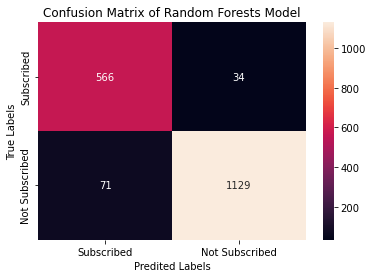

In [30]:
# Calculates Confusion Matrix and draws a heatmap out of that
conf_matrix = confusion_matrix(y_test_encoded, predictions, labels=[1,0])

sns.heatmap(
    conf_matrix, annot=True, fmt='.0f',
    xticklabels = ["Subscribed", "Not Subscribed"],
    yticklabels = ["Subscribed", "Not Subscribed"])

plt.ylabel("True Labels")
plt.xlabel("Predited Labels")
plt.title("Confusion Matrix of Random Forests Model")
plt.show()

In [31]:
# Prints the classification report
print(classification_report(y_test_encoded, predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1200
           1       0.89      0.94      0.92       600

    accuracy                           0.94      1800
   macro avg       0.93      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800



Recall of positive cases has improved from **~0.70** (KNN model) to **~0.90** in the Random Forests model.

##### **Receiver Operating Characteristics (ROC) Curve & Area Under Curve (AUC) Score**

In [32]:
# Performs predictions to receive probabilities
predictions_proba = rf_clf.predict_proba(X_test_transformed)

# Prints few predictions
print(predictions_proba)

[[0.96 0.04]
 [0.51 0.49]
 [0.6  0.4 ]
 ...
 [0.97 0.03]
 [0.03 0.97]
 [0.97 0.03]]


Second element of each the predictions contains probability for class label 1.

In [33]:
# Computes the ROC AUC score
auc_score = roc_auc_score(y_test_encoded, predictions_proba[:, 1])

# Prints the score
print("ROC AUC score: {:.2f}".format(auc_score))

ROC AUC score: 0.97


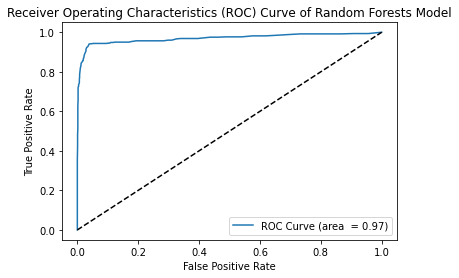

In [34]:
# Plots the ROC curve

fpr, tpr, thresholds = roc_curve(y_test_encoded, predictions_proba[:, 1], drop_intermediate=False)

plt.plot(fpr, tpr, label = "ROC Curve (area  = {:.2f})".format(auc_score))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics (ROC) Curve of Random Forests Model")
plt.legend()
plt.show()

##### **Tuning Hyperparameters**

In our example, the hyperparameters and corresponding set of values to search for are as follows:

1. **max_depth** – 10 or 15.
2. **n_estimators** - 10 or 20.
3. **max_features:** - sqrt or 0.2.

In [35]:
# Initializes Grid Search Cross Validation

grid_search_cv = GridSearchCV(
    
    RandomForestClassifier(),  # estimator
    
    # Parameters search grid
    [
        {
            "max_depth": [10, 15], 
            "n_estimators": [10, 20],
            "max_features": ['sqrt', 0.2]
        }
    ], 
    
    n_jobs=-1,               # Making use of all available processors
    
    refit=True,              # Default: True
    
    cv = 5,                  # Number of folds for cross-validation
    
    scoring="roc_auc",       # Cross-validated model performance metric.
    
    return_train_score=True  # Default: False
)

In [36]:
# Performs hyperparameters search over cross validation
# NOTE: The following step may take several minutes to complete
grid_search_cv.fit(X_train_transformed, y_train_encoded)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [10, 15], 'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             return_train_score=True, scoring='roc_auc')

In [37]:
# Prints the best scores out of cross-validation
print("Best Grid Search CV Score:", grid_search_cv.best_score_)

Best Grid Search CV Score: 0.929858418367347


In [38]:
# Prints the best set of parameters that scores highest in CV
print(grid_search_cv.best_params_)

{'max_depth': 15, 'max_features': 0.2, 'n_estimators': 20}


In [39]:
# Lists the cross-validation performance score against 
# each set of hyperparameters the model was built on
with option_context('display.max_colwidth', 150):
    display(pd.DataFrame({
        "param": grid_search_cv.cv_results_["params"], 
        "mean_test_score": grid_search_cv.cv_results_["mean_test_score"], 
        "std_test_score": grid_search_cv.cv_results_["std_test_score"]}))

,param,mean_test_score,std_test_score
0,"{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 10}",0.843353,0.005190
1,"{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 20}",0.858989,0.017749
2,"{'max_depth': 10, 'max_features': 0.2, 'n_estimators': 10}",0.851703,0.013733
3,"{'max_depth': 10, 'max_features': 0.2, 'n_estimators': 20}",0.863212,0.015416
4,"{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 10}",0.919836,0.006459
5,"{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 20}",0.926954,0.008092
6,"{'max_depth': 15, 'max_features': 0.2, 'n_estimators': 10}",0.921522,0.010387
7,"{'max_depth': 15, 'max_features': 0.2, 'n_estimators': 20}",0.929858,0.007208


As the grid search for best combination was performed with parameter **_refit_** set to _True_, the model (to be referenced through object _grid_search_cv_) is already trained with the mentioned best parameters and that model could be used for prediction on new observations.

##### **Receiver Operating Characteristics (ROC) Curve & Area Under Curve (AUC) Score**

In [40]:
# Performs predictions to receive probabilities
predictions_proba = grid_search_cv.best_estimator_.predict_proba(X_test_transformed)

In [41]:
# Computes the ROC AUC score
auc_score = roc_auc_score(y_test_encoded, predictions_proba[:, 1])

# Prints the score
print("ROC AUC score: {:.2f}".format(auc_score))

ROC AUC score: 0.95


##### **Feature Ranking**

In [42]:
# Maps the features and their importance
feature_rank = pd.DataFrame({
    "feature": num_features + 
        transform_pipeline.named_transformers_["categorical"].get_feature_names_out().tolist(), 
    "importance": rf_clf.feature_importances_})

In [43]:
# Sorts the features based on their importance
feature_rank = feature_rank.sort_values("importance", ascending = False)

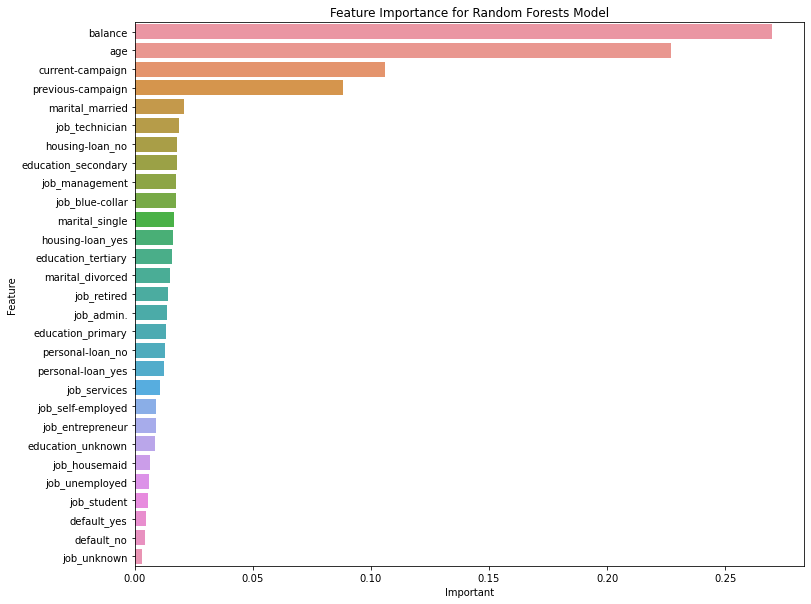

In [44]:
# Plots the feature importance for Random Forests model

plt.figure( figsize = ( 12, 10 ))
sns.barplot(x="importance", y="feature", data=feature_rank)
plt.xlabel("Important")
plt.ylabel("Feature")
plt.title("Feature Importance for Random Forests Model")
plt.show()

The above analysis could also be very helpful in selecting top features that the final model will be built on. The cumulative sum of feature important is shown below. For example, to get a model that can explain 75% of the variance of the test data, top 7 features can be considered for modeling using this algorithm.

In [45]:
feature_rank["cumsum"] = feature_rank.importance.cumsum() * 100
display(feature_rank)

,feature,importance,cumsum
1,balance,0.269852,26.985162
0,age,0.227179,49.703092
2,current-campaign,0.105823,60.285416
3,previous-campaign,0.088143,69.099719
17,marital_married,0.020756,71.175306
13,job_technician,0.018933,73.068585
25,housing-loan_no,0.018056,74.874219
20,education_secondary,0.017810,76.655264
8,job_management,0.017692,78.424447
5,job_blue-collar,0.017680,80.192441
